In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [49]:
from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/My Drive/Colab Notebooks'
!pwd #Prints the present working directory

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks


In [50]:
df = pd.read_csv('sto.csv')
#
df= df.replace(',','', regex=True)

df["Open"] = df.Open.astype(float)
df["High"] = df.High.astype(float)
df["Low"] = df.Low.astype(float)
df["Close*"] = df["Close*"].astype(float)
df["Adj Close**"] = df["Adj Close**"].astype(float)
df["Volume"] = df.Volume.astype(float)
df.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close*         float64
Adj Close**    float64
Volume         float64
dtype: object

In [51]:
print(df.head())
print(df.shape)
print(df.columns)

          Date     Open     High      Low   Close*  Adj Close**        Volume
0  Oct 03 2022  3609.78  3806.91  3604.93  3783.28      3783.28  1.424644e+10
1  Sep 26 2022  3682.72  3736.74  3584.13  3585.62      3585.62  2.447590e+10
2  Sep 19 2022  3849.91  3907.07  3647.47  3693.23      3693.23  2.133210e+10
3  Sep 12 2022  4083.67  4119.28  3837.08  3873.33      3873.33  2.472847e+10
4  Sep 05 2022  3930.89  4076.81  3886.75  4067.36      4067.36  1.588645e+10
(1300, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')


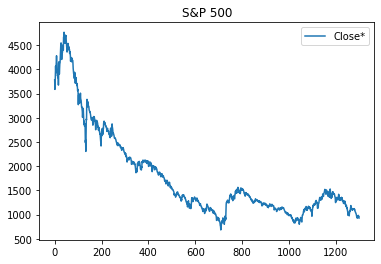

In [ ]:
df[['Close*']].plot()
plt.title("S&P 500")
plt.show()

Text(0.5, 1.0, 'S&P 500 Cumulative Returns')

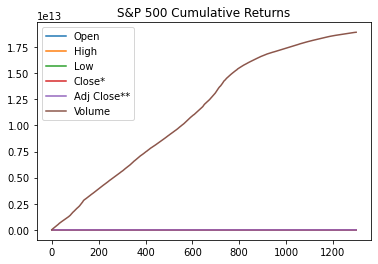

In [ ]:
dr = df.cumsum()
dr.plot()
plt.title('S&P 500 Cumulative Returns')

In [ ]:
df['Date']

0       Oct 03 2022
1       Sep 26 2022
2       Sep 19 2022
3       Sep 12 2022
4       Sep 05 2022
           ...     
1295    Dec 08 1997
1296    Dec 01 1997
1297    Nov 24 1997
1298    Nov 17 1997
1299    Nov 10 1997
Name: Date, Length: 1300, dtype: object

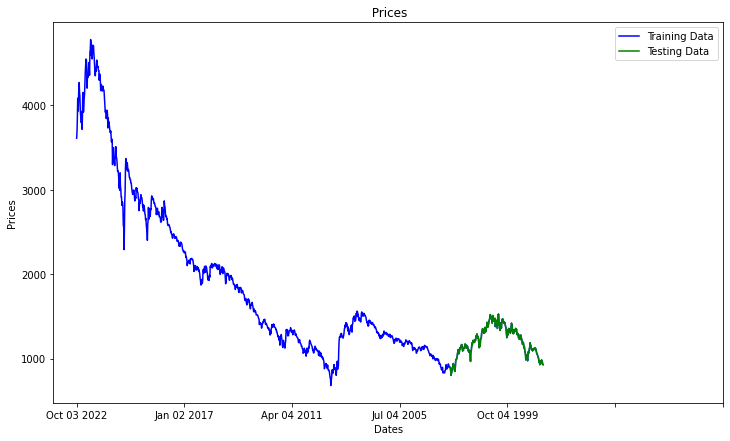

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title(' Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [52]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [183]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
#  Build Model 
model = ARIMA(history, order=(5,2,5))  
fitted = model.fit()  




# Forecast using 90% confidence interval
predictions, se, conf = fitted.forecast(260, alpha=0.1) 
fc_series = pd.Series(predictions, index=test_data.index)
#for t in range(len(test_ar)):
#    model = ARIMA(history, order=(1,1,2))
#    model_fit = model.fit()
#    output = model_fit.forecast()
#    yhat = output[0]
#    predictions.append(yhat)
#    obs = test_ar[t]
#    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

#We only need to make model once, the commented out approach creates model per single prediction. 
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 155079.902
Symmetric mean absolute percentage error: 32.903


In [184]:
print(predictions[160])
print(test_data['Open'][1200])
print(test_data.index)



845.6992442814901
1282.81
RangeIndex(start=1040, stop=1300, step=1)


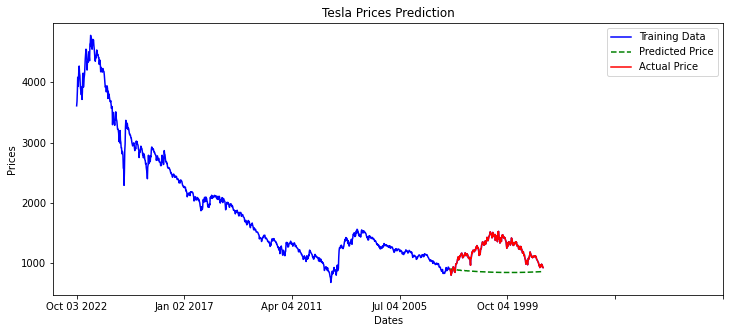

In [185]:
plt.figure(figsize=(12,5))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [186]:
x= test_ar

print(x)



[ 897.65  884.39  835.32  800.58  827.37  845.39  889.81  893.92  916.07
  940.86  928.77  908.64  864.24  852.84  847.76  921.39  989.03  989.82
  989.14 1007.27 1027.53 1067.14 1083.82 1106.59 1054.99 1073.43 1076.32
 1125.17 1111.01 1122.73 1147.39 1148.7  1166.16 1164.31 1131.78 1089.84
 1104.18 1096.22 1122.2  1133.28 1127.58 1145.6  1172.51 1161.02 1144.89
 1123.09 1158.31 1139.45 1150.34 1138.65 1120.31 1087.2  1104.61 1073.48
 1091.65 1071.37 1040.94  965.8  1092.54 1085.78 1133.58 1184.93 1161.97
 1190.16 1214.35 1205.82 1210.85 1215.68 1190.59 1224.42 1225.35 1214.36
 1264.96 1260.67 1277.89 1291.96 1245.67 1266.61 1253.05 1242.98 1183.5
 1128.43 1160.33 1139.83 1150.53 1233.42 1234.18 1245.86 1301.53 1314.76
 1349.47 1354.92 1342.54 1318.32 1298.35 1320.28 1305.97 1312.15 1369.89
 1315.18 1341.77 1367.72 1365.98 1428.76 1379.58 1396.93 1374.17 1408.99
 1436.52 1448.72 1465.81 1494.5  1520.77 1506.45 1491.72 1471.84 1462.93
 1419.89 1480.19 1509.98 1478.9  1454.6  1441.48 146

In [187]:
#a=predictions.flatten()
df =predictions
#df
print(x-df)



[ 4.64849547e+00 -7.62787671e+00 -6.26050498e+01 -1.03492305e+02
 -7.62737331e+01 -5.17102714e+01 -6.22599193e-01  4.29989142e+00
  2.18112208e+01  4.18911058e+01  3.02780649e+01  1.54544005e+01
 -2.36300632e+01 -3.43331859e+01 -4.30109357e+01  2.70413697e+01
  9.52015534e+01  1.00312943e+02  1.03897818e+02  1.22640575e+02
  1.40135748e+02  1.77049914e+02  1.94275664e+02  2.20577462e+02
  1.72418180e+02  1.91407120e+02  1.92193142e+02  2.39032105e+02
  2.25427430e+02  2.40045392e+02  2.67496814e+02  2.69306629e+02
  2.85184567e+02  2.81854417e+02  2.49876992e+02  2.10325703e+02
  2.26943959e+02  2.19445295e+02  2.44253849e+02  2.54264360e+02
  2.49105237e+02  2.69104202e+02  2.97885618e+02  2.86826002e+02
  2.69846311e+02  2.47293464e+02  2.83036395e+02  2.65824958e+02
  2.78262708e+02  2.66977294e+02  2.48038547e+02  2.14418752e+02
  2.32329534e+02  2.02580878e+02  2.22040087e+02  2.02142263e+02
  1.71308098e+02  9.58437193e+01  2.23059655e+02  2.17464049e+02
  2.66345729e+02  3.18057